## [Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

- Logistic regression is an algorithm for **classification**.

- Logistic regression builds a **linear model** that separates the two classes by a hyperplane.

<img src="../_img/linear_classifier.jpg" width="300" align="left">

For simplicity, let' discuss first the **univariate** case, with a **binary target** variable and **no bias** term.

<img src="../_img/logreg_1d.jpg" width="400" align="left">

### The Programming Exam Problem

In [1]:
import pandas as pd
data = [
    {'name': 'David Beckham',    'study_time': 0,   'result': 0},
    {'name': 'Jessica Scott',    'study_time': 7,   'result': 1},
    {'name': 'Jack Johnson',     'study_time': 3.5, 'result': 0},
    {'name': 'Scunner Campbell', 'study_time': 6,   'result': 0},
    {'name': 'Plain Jane ',      'study_time': 3,   'result': 1},
    {'name': 'Archie Gillis',    'study_time': 15,  'result': 1},
]
df = pd.DataFrame(data)
df

,name,study_time,result
0,David Beckham,0.0,0
1,Jessica Scott,7.0,1
2,Jack Johnson,3.5,0
3,Scunner Campbell,6.0,0
4,Plain Jane,3.0,1
5,Archie Gillis,15.0,1


The above toy data set contains 2 attributes of 6 students:
- Hours spent on preparing for the exam.
- Did the student pass the exam? (0=no, 1=yes)

**Exercise 1**: Train a univariate logistic regression model that estimates the `result` column from the `study_time` column!

In [13]:
df["study_time"].values  #input
df["result"].values      #target

array([0, 1, 0, 0, 1, 1])

In [47]:
import numpy as np
def sigmoid(t):
    return (1 / (1 + np.exp(-t)))

In [15]:
sigmoid(0)

0.5

In [16]:
sigmoid(np.array([1,2,3]))

array([0.73105858, 0.88079708, 0.95257413])

In [17]:
def ce(y, yhat):
    return (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat)).sum()

In [20]:
w =  0    # initial model parameter

for k in range(10):
    yhat = sigmoid(x * w)
    ce = (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat)).sum()
    ce_first_derivate = (yhat - y) @ x
    ce_second_derivate = (yhat * (1 - yhat)) @ x**2
    print(f"ce(w)={ce:.6f}\tce'(w)={ce_second_derivate:.6f}\tw={w}")
    w = w - ce_first_derivate / ce_second_derivate

ce(w)=4.158883	ce'(w)=82.812500	w=0
ce(w)=3.776799	ce'(w)=60.161323	w=0.09358490566037736
ce(w)=3.771515	ce'(w)=55.425415	w=0.10666796800443652
ce(w)=3.771506	ce'(w)=55.224864	w=0.1072285464056069
ce(w)=3.771506	ce'(w)=55.224500	w=0.10722956451957244
ce(w)=3.771506	ce'(w)=55.224500	w=0.10722956452292766
ce(w)=3.771506	ce'(w)=55.224500	w=0.1072295645229277
ce(w)=3.771506	ce'(w)=55.224500	w=0.10722956452292769
ce(w)=3.771506	ce'(w)=55.224500	w=0.10722956452292769
ce(w)=3.771506	ce'(w)=55.224500	w=0.10722956452292769


Text(0, 0.5, 'P(ass the exam)')

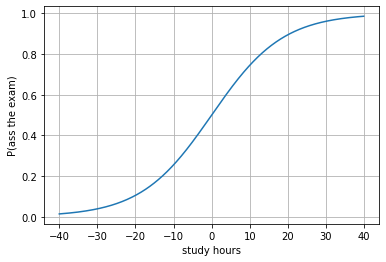

In [27]:
# Display the probability of passing the exam (according to the model)
# as a function of the study hours!
import matplotlib.pyplot as plt
x2 = np.arange(-40, 40, 0.1)   #study time
yhat2 = sigmoid(x2 * w)
plt.plot(x2, yhat2)
plt.grid(True)
plt.xlabel('study hours')
plt.ylabel('P(ass the exam)')

### The Wisconsin Breast Cancer Problem

<img src="../_img/wisconsin_illustration.jpg" width="200" align="left">

The Wisconsin Breast Cancer data set contains the attributes of 699 suspicious lesions in tissue microscopy images. The raw data is contained in [wisconsin_data.txt](../_data/wisconsin_data.txt), the description can be read in [wisconsin_names.txt](../_data/wisconsin_names.txt). The task is to estimate if the lesion is malicious (4) or benign (2), based on the image attributes of the lesion. Therefore the task is a binary classification problem.

**Exercise 2**: Train a univariate logistic regression model for each input feature separately, and measure the *average* cross-entropy of the models! Use the full data set both for training and evaluation!

In [31]:
# Column names.
names = [
    'Sample_code_number',
    'Clump_Thickness',
    'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion',
    'Single_Epithelial_Cell_Size',
    'Bare_Nuclei',
    'Bland_Chromatin',
    'Normal_Nucleoli',
    'Mitoses',
    'Class'
]

In [37]:
wisconsin_breast_cancer = pd.read_csv('../_data/wisconsin_data.txt', names=names, na_values='?')

In [38]:
wisconsin_breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample_code_number           699 non-null    int64  
 1   Clump_Thickness              699 non-null    int64  
 2   Uniformity_of_Cell_Size      699 non-null    int64  
 3   Uniformity_of_Cell_Shape     699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  683 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [39]:
wisconsin_breast_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
Sample_code_number,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
Clump_Thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity_of_Cell_Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity_of_Cell_Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal_Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single_Epithelial_Cell_Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Bare_Nuclei,683.0,3.544656e+00,3.643857,1.0,1.0,1.0,6.0,10.0
Bland_Chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Normal_Nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0


In [40]:
# Handle null values.
se = wisconsin_breast_cancer['Bare_Nuclei']
se.fillna(se.mean(), inplace=True)

In [53]:
def avg_cross_entropy(y, yhat):
    return (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat)).mean()
    

def train_logreg(x, y):
    w = 0                                            # initial model parameter
    for k in range(10):
        yhat = sigmoid(x * w)
        ce_first_derivate = (yhat - y) @ x
        ce_second_derivate = (yhat * (1 - yhat)) @ x**2
        w = w - ce_first_derivate / ce_second_derivate
    return w

In [54]:
y = wisconsin_breast_cancer['Class'].values // 2 - 1 # target vector

for name in names[1:-1]:
    x = wisconsin_breast_cancer[name].values         # input vector
    w = train_logreg(x, y)                           # train model
    yhat = sigmoid(x * w)                            # make prediction
    ace = avg_cross_entropy(y, yhat)
    print(f'{name:30} {ace} {w}')

Clump_Thickness                0.6877388587845084 0.03995610011874475
Uniformity_of_Cell_Size        0.6383720214989874 0.16899601558126182
Uniformity_of_Cell_Shape       0.6451413035345479 0.15502997222673773
Marginal_Adhesion              0.6590996892553264 0.14093730167294283
Single_Epithelial_Cell_Size    0.6868149890759724 0.0582681374215134
Bare_Nuclei                    0.6329906292130498 0.15362976756622004
Bland_Chromatin                0.6797548410004657 0.07917958833296734
Normal_Nucleoli                0.6512356138866332 0.15213614235880277
Mitoses                        0.6895896950808426 0.07347703509166521


**Exercise 3**: Repeat the previous experiment using scikit-learn!

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss # (log_loss = avg_cross_entropy)

cl = LogisticRegression(fit_intercept=False, C=np.inf)

y = df['Class'].values // 2 - 1      # target vector
for name in names[1:-1]:
    X = df[[name]].values            # input matrix
    cl.fit(X, y)                     # train model
    yhat = cl.predict_proba(X)[:, 1] # make prediction
    ace = log_loss(y, yhat)
    print(f'{name:30} {ace} {cl.coef_[0][0]}')

In [ ]:
# take the Bare_Nuclei => Class model
X = df[['Bare_Nuclei']].values
cl.fit(X, y)

In [ ]:
# What is the probability of maliciousness if Bare_Nuclei=10?
cl.predict_proba([[10]])[0][1]

### Multivariate Logistic Regression

The previous approach can be generalized to allows multiple input features.

- model's prediction: $\hat{y} = \sigma(Xw)$<br>
- objective function: $CE(w) = -\log(\hat{y})^Ty - \log(1 - \hat{y})^T(1 - y)$<br>
- gradient vector: $\frac{d}{dw} CE(w) = X^T(\hat{y} - y)$<br>
- Hessian matrix: $\left(\frac{d}{dw}\right)^2 CE(w) = X^T \mathrm{diag}\left(\hat{y}(1 - \hat{y})\right) X$
- Newton-step: $w_{\mathrm{new}} = w - \left[\left(\frac{d}{dw}\right)^2 CE(w)\right]^{-1} \left[\frac{d}{dw} CE(w)\right]$

Similarly to linear regression, the bias term can be handled by introducing a constant 1 feature.
<br><br>

**Exercise 4**: Train a multivariate logistic regression model and measure its *average* cross-entropy! Use the full data set both for training and evaluation! Implement the training algorithm without using scikit-learn!

In [56]:
X = df[names[1:-1]].values
y = df['Cass'].values // 2 - 1

KeyError: "None of [Index(['Clump_Thickness', 'Uniformity_of_Cell_Size',\n       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',\n       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',\n       'Normal_Nucleoli', 'Mitoses'],\n      dtype='object')] are in the [columns]"

**Exercise 5**: Repeat the previous experiment using scikit-learn!

**Exercise 6**: Train the model on a randomly selected 70% of the data and evaluate it on the remaining 30%!


### $K$-Fold Cross-Validation
- Idea: Randomly split the data to $K$ roughly equal partitions and run $K$ experiments!
- In the $i$-th experiment, partition $i$ is used as the test set and all other partitions as the training set.
- In the end, the scores obtained from the $K$ experiments are averaged.
- $K$-fold cross-validation is slower but more reliable than the simple train-test split.
- In the *stratified* variant of the method, the same distribution of labels is enforced in every partition.

<img src="../_img/cross_val.jpg" width="350" align="left" style="opacity: 0.8">

**Exercise 8**: Replace the train-test split to 10-fold cross valiadtion!